This script generates Democratic and Republican primary random forest models, tested on both the 2018 senate and governor's primaries.

In [103]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(5)

In [104]:
#Read in data and filter out test data
turnout_train_rep = pd.read_csv("turnout_train_rep.csv")
turnout_train_dem = pd.read_csv("turnout_train_dem.csv")


turnout_train_rep_use = turnout_train_rep[turnout_train_rep['Year'] != 2018]
turnout_train_dem_use = turnout_train_dem[turnout_train_dem['Year'] != 2018]





Training
R^2:  0.9840432560803124
Mean Absolute Error (MAE): 0.48963943569553753
Mean Squared Error (MSE): 0.9797785155446176


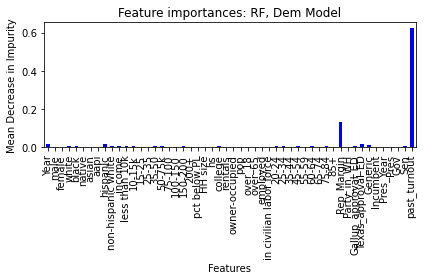

In [105]:

#Random Trees: Dem model

turnout_train_dem_mod = turnout_train_dem_use

#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);

#Make predictions
pred = rf.predict(model_feats)

#Print Score
print("Training")

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'blue')
plt.title("Feature importances: RF, Dem Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()


In [106]:
np.random.seed(5)
#Test on 2018 Senate race
turnout_train_dem_mod = turnout_train_dem

#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Sen']


#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff', ], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#make predictions
pred = rf.predict(model_feats)

#Print Score
print("Testing: Dem Sen 2018")

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


Testing: Dem Sen 2018
R^2:  0.856527930027376
Mean Absolute Error (MAE): 1.4650188976377954
Mean Squared Error (MSE): 6.044691030708664


In [107]:
np.random.seed(5)
#Test on 2018 Gov race
turnout_train_dem_mod = turnout_train_dem
#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Gov']
#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#make predictions
pred = rf.predict(model_feats)

#Print Score
print("Testing: Dem Gov 2018")

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Dem Gov 2018
R^2:  0.8136220710393126
Mean Absolute Error (MAE): 1.5696948818897638
Mean Squared Error (MSE): 6.675049476968507


Training
R^2:  0.9867912022997122
Mean Absolute Error (MAE): 0.6334188976377957
Mean Squared Error (MSE): 1.121953452000001


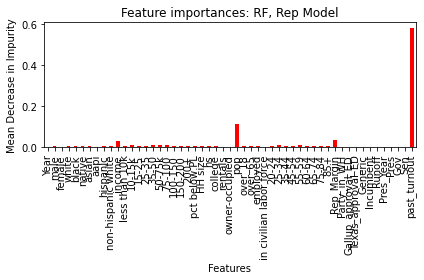

In [111]:
np.random.seed(5)
#Random Trees: Rep model

turnout_train_rep_mod = turnout_train_rep_use


#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']

#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);

#Make predictions
pred = rf.predict(model_feats)

#Print Score
print("Training")

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: RF, Rep Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()



In [112]:
np.random.seed(5)
#Test on 2018 Senate race
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Sen']
#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']

#make predictions
pred = rf.predict(model_feats)

#Print Score
print("Testing: Rep Sen 2018")

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


Testing: Rep Sen 2018
R^2:  0.6999382500828167
Mean Absolute Error (MAE): 3.522765354330709
Mean Squared Error (MSE): 27.540659650157487


In [110]:
np.random.seed(5)
#Test on 2018 Gov race
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Gov']
#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']

#make predictions
pred = rf.predict(model_feats)

#Print Score
print("Testing: Rep Gov 2018")

print("R^2: ",rf.score(model_feats, model_outcome))

#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


Testing: Rep Gov 2018
R^2:  0.7017476416760258
Mean Absolute Error (MAE): 3.4948960629921255
Mean Squared Error (MSE): 27.43305968834645
16.906556692913384
